# CSV to `GeoDataFrame`

import packages and update viewing options

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

In [2]:
# Display all columns when looking at dfs
pd.set_option('display.max.columns', None)

# Import power plants data
url = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(url)

In [3]:
#power_plants = power_plants.drop(columns = 'Unnamed: 0')

power_plants.head(3)

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Let's use the longitude and latitude columns in the csv to create a grodataframe
these indicate the location of the powerplants in the NAD83 CRS (EPSG:4269)
we can use geopanads unction `points_from_xy()`

In [4]:
# create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)
#create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,   # data frame
                                geometry = points, # specify geometry column
                                crs = 'EPSG:4269') # specify crs

power_plants.head(3)

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,0.0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [5]:
print('CRS: ', power_plants.crs)
print('is CRS geographic?: ', power_plants.crs.is_geographic)

CRS:  EPSG:4269
is CRS geographic?:  True


<AxesSubplot:>

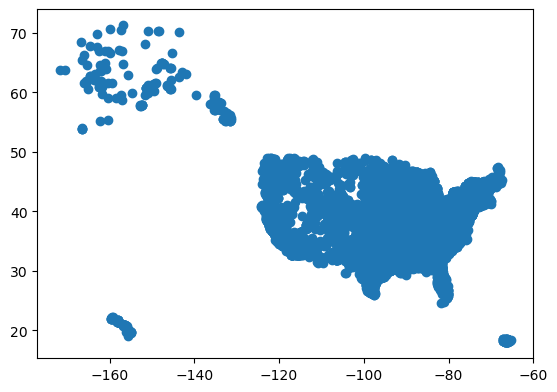

In [6]:
# detects latitude and longitude automatically
# defaults to scatter
power_plants.plot()

In [7]:
# Import states data
fp = os.path.join('/', 'courses', 'EDS220', 'data', 'tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


CRS is epsg:4269


<AxesSubplot:>

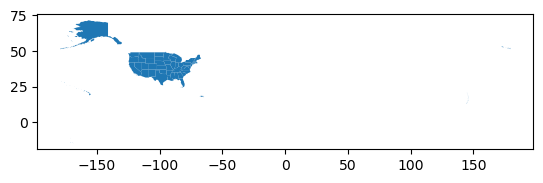

In [8]:
print(f'CRS is {states.crs}')
states.plot()

# for loops

it can be easirt ot work with the codes as numbers inseatd of strings, lets update the coresponding columnsin the go-dataftame:, region, division, statefp

first think, check if these are columns with strings

In [9]:
print(f"region is string dtype?: {is_string_dtype(states['region'])}")
print(f"region is string dtype?: {is_string_dtype(states['division'])}")
print(f"region is string dtype?: {is_string_dtype(states['statefp'])}")

region is string dtype?: True
region is string dtype?: True
region is string dtype?: True


this invonceniet because it reeats the same piece of code, only changint he column name. instead using a for loop allows to succinctly print the asame info:

In [10]:
code_cols = ['region', 'division', 'statefp']

for column in code_cols:
    print(f"{column} is string dtype?: {is_string_dtype(states[column])}")

region is string dtype?: True
division is string dtype?: True
statefp is string dtype?: True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. in this cases, we iterate over the list of column names

**Dry code**

dry = don't repeat yourself is a core programming principle. use for loop if repeating

next, update data type of the code columns to be integers.
this time, we verify the data type of the column using the `is_numeric_dtype()` and `assert` statement:

In [11]:
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # check conversion

the `assert` keyword does nothing if the expression next to it evaluates to `True`.
if the expression evaluates to `False` then `assert` raises an `AssertionError` and stops your code form running.

Example:

In [12]:
# does nothing if statement is True
assert 2 + 2 == 4

In [13]:
# raises an error if statement is False
# assert 2 + 2 == 3

For this lesson we want to only use mainland states, which means we gotta filter

<AxesSubplot:>

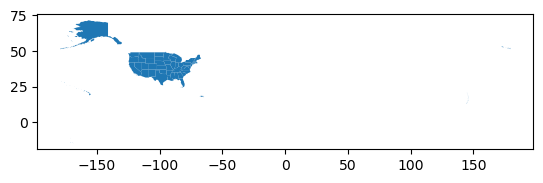

In [14]:
states.plot()

## check-in
- what are the unique values for region, division, or state codes in the data
- which codes should we select to keep only states in the contiguous us?

In [15]:
for i in code_cols:
    print(f"{i} unique values: {states[i].unique()}\n")

region unique values: [3 2 1 4 9]

division unique values: [5 3 4 1 8 9 2 7 6 0]

statefp unique values: [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]



Hawaii and alaska have codes 2, 15 and then region 9 should also be excluded because it encompasses more non mainland states

<AxesSubplot:>

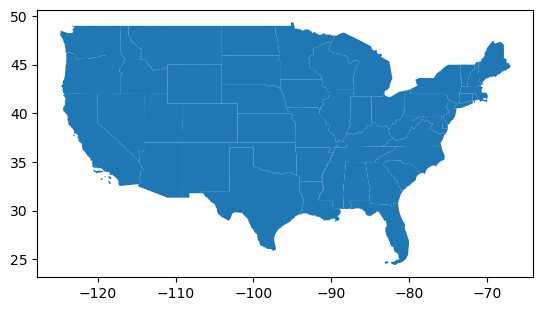

In [16]:
# select contiguous US states
contiguous = states[ (states.region != 9) & (~states.statefp.isin([2, 15])) ]

contiguous.plot()

`~` tilde symbol is used in python to negate a statement

## check in
select the data in the `power_plants` data frame for the contiguous us states.

In [17]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

In [18]:
power_plants

,Unnamed: 0,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,1.0,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,2.0,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,3.0,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,4.0,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)
5,5.0,11575,10,Greene County,195,Alabama Power Co,Electric Utility,Highway 43,Demopolis,Greene,Alabama,36732.0,natural gas,Natural Gas = 1256.1 MW,Natural Gas Fired Combustion Turbine; Natural ...,1288.4,1256.1,NaN,NaN,NaN,NaN,NaN,NaN,1256.1,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.781100,32.601700,POINT (-87.78110 32.60170)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12004,12003.0,23573,66723,Sawtell Solar,65736,"Sawtell Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-82.375953,35.380139,POINT (-82.37595 35.38014)
12005,12004.0,23574,66724,Southwick Solar,65737,"Southwick Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.367698,36.009321,POINT (-79.36770 36.00932)
12006,12005.0,23575,66725,Whiskey Solar,65738,"Whiskey Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.736312,35.273434,POINT (-79.73631 35.27343)
12007,12006.0,23576,66729,(3K) 59 Hetcheltown Rd,64872,"Distributed Solar Development, LLC",IPP Non-CHP,NaN,NaN,NaN,New York,NaN,solar,Solar = 1.4 MW,Solar Photovoltaic,1.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-73.910480,42.876570,POINT (-73.91048 42.87657)


In [19]:
contiguous.crs == power_plants.crs

True

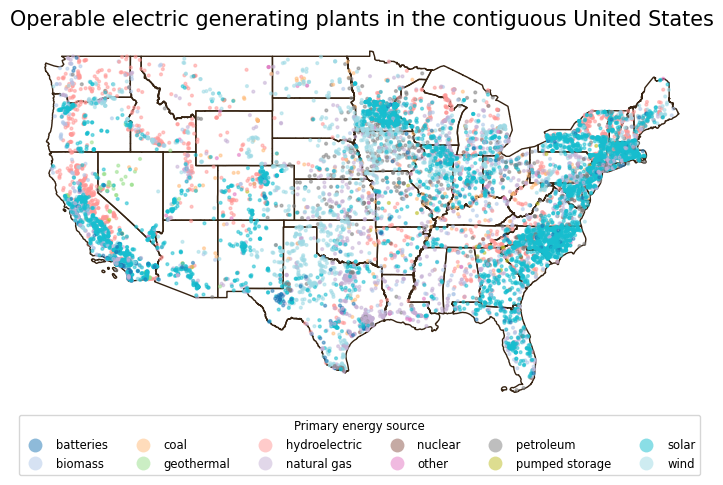

In [20]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6  
                  })
                  
plt.show()

we controlled the legend location using `loc` and `bbox_to_anchor` in the `legend_kwds`: 

- `loc` indicates **the corner of the legend that we want to use for placement**,
- `bbox_to_anchor` is a tuple with coordinats indicating where to place the corner specified in `loc` relative to the axes. values between 0 to ` are *inside* the axes`